<p class="pull-left">
ANLT 212 - Analytics Computing
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Trang Vu 2019
</ul>
</div>

<font color='Navy' size=3><em> Trang Vu - 989357826<br>
Module 4 Report -  Retail </em>

# <font color='Navy' size=10><center>MODULE 4 REPORT <em><br>Retail Data Analytics </em></center></font> 

## <font color='black' size=6><ul class="list-inline">Objective of Proposed Research and Background Information</ul></font>

Amazon is a large retail coporation which they has a lot of stores and different agents around the country. In order 
to better provide recommendation and solution for Amazon to increase their sales. I will explore their data to understand
their context as well as environment in accordance to the trending and the timing as well as how effective each 
category affecting their sales in accordance to their database. 

I will first explore the data to gain the comprehensive knowledge of their context and what they have in the table.
Merging the table will help to have better picture and direction to go deeper in to markteting analysis and compare
different methods of Markdowns to see which is the most efficient and predict the sales base on MarkDown coefficient.

Lastly, I will focus on other factors such as Temperature, CPI and fuel price to see and analyze their relationship 
with weekly sales to provide Amazon with better understanding of the market and their current Markdown Strategy. 
I will then give Amazon a bigger picture to combine which methods to which factors to promote and boost sales 
significantly based on prediction of the future and factor analysis.

### <font color='brown' size=6><ul class="list-inline">1. Data Exploration </ul></font>

In [7]:
# Loading the data file using read.csv function and reading the data in the R environment.
sales <- read.csv("sales data-set.csv",stringsAsFactors =F)
features <- read.csv("Features data set.csv",stringsAsFactors =F)
stores <- read.csv("stores data-set.csv",stringsAsFactors =F)

In [2]:
# Explore the first five rows of the sales dataset
head(sales,n=5)

Store,Dept,Date,Weekly_Sales,IsHoliday
1,1,05/02/2010,24924.50,FALSE
1,1,12/02/2010,46039.49,TRUE
1,1,19/02/2010,41595.55,FALSE
1,1,26/02/2010,19403.54,FALSE
1,1,05/03/2010,21827.90,FALSE


In [3]:
# Explore the last five rows of the features dataset
tail(features,n= 5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8186,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NA,NA,FALSE
8187,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NA,NA,FALSE
8188,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NA,NA,FALSE
8189,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NA,NA,FALSE
8190,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NA,NA,FALSE


In [4]:
# Explore the first five rows of the store dataset
head(stores, n = 5)

Store,Type,Size
1,A,151315
2,A,202307
3,B,37392
4,A,205863
5,B,34875


In [5]:
# Find out how many number of rows from the sales, features and stores dataframe.
nrow(sales)
nrow(features)
nrow(stores)

[1] 421570

[1] 8190

[1] 45

In [6]:
# Find out how many number of columns from the sales, features and stores dataframe.
ncol(sales)
ncol(features)
ncol(stores)

[1] 5

[1] 12

[1] 3

In [7]:
# What are the names of each columns in the features data table.
names(features)

[1] "Store"        "Date"         "Temperature"  "Fuel_Price"   "MarkDown1"   
 [6] "MarkDown2"    "MarkDown3"    "MarkDown4"    "MarkDown5"    "CPI"         
[11] "Unemployment" "IsHoliday"

In [8]:
# What are the names of each columns in the sales data table.
names(sales)

[1] "Store"        "Dept"         "Date"         "Weekly_Sales" "IsHoliday"

In [9]:
# What are the names of each columns in the stores data table.
names(stores)

[1] "Store" "Type"  "Size"

In [10]:
# Let's see which day has the most sales over the dataset.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
datemost <- getmode(sales$Date)

In [11]:
datemost

[1] "23/12/2011"

In [12]:
# Let's find out how many types of stores do we have
unique(stores$Type)

[1] "A" "B" "C"

In [13]:
# Take a look at general information of each variables and the type of variables in features and sales dataframe.
str(features)
str(sales)

'data.frame':	8190 obs. of  12 variables:
 $ Store       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : chr  "05/02/2010" "12/02/2010" "19/02/2010" "26/02/2010" ...
 $ Temperature : num  42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price  : num  2.57 2.55 2.51 2.56 2.62 ...
 $ MarkDown1   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown2   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown3   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown4   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown5   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ CPI         : num  211 211 211 211 211 ...
 $ Unemployment: num  8.11 8.11 8.11 8.11 8.11 ...
 $ IsHoliday   : logi  FALSE TRUE FALSE FALSE FALSE FALSE ...
'data.frame':	421570 obs. of  5 variables:
 $ Store       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Dept        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : chr  "05/02/2010" "12/02/2010" "19/02/2010" "26/02/2010" ...
 $ Weekly_Sales: num  24924 46039 41596 19404 21828 ...
 $ IsHoliday   : logi  F

In [14]:
# Find out how many stores Amazon has in total.
unique(features$Store)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45

***Let's see which type of store has the most stores in the dataset.***

In [15]:
A.percent <- nrow(stores[stores$Type == 'A',c("Store","Type")])/nrow(stores)

In [16]:
A.percent

[1] 0.4888889

In [17]:
B.percent <- nrow(stores[stores$Type == 'B',c("Store","Type")])/nrow(stores)

In [18]:
B.percent <- nrow(stores[stores$Type == 'B',c("Store","Type")])/nrow(stores)

In [19]:
C.percent <- nrow(stores[stores$Type == 'C',c("Store","Type")])/nrow(stores)

In [20]:
C.percent

[1] 0.1333333

This section is how I approach the data source and have a general ideas of this data, what it includes and the overallcharacteristic of the data, which provide me an overview of what it looks like and also gain some valuable information. It seems like type A stores has the most stores in the area, following by type B and type C has a more humble percentage. 

In [21]:
#Assign records in Weekly_sales column in sales dataset into salesnum variable.
salesnum <- sales$Weekly_Sales

In [22]:
# Caculate mean and assign it into the variable.
salesnum.mean <- mean(salesnum, na.rm = TRUE)

In [23]:
# Let's find out the average weekly sales
salesnum.mean

[1] 15981.26

### <font color='brown' size=6><ul class="list-inline">2. Merge </ul></font>

In [8]:
# First, let's merge table features with table stores, named it features_stores. 
# The common column in this case is column "Store"
features_stores <- merge(features, stores, by = "Store")

In [9]:
# Secondly, let's merge table features_stores that we just joined with table sales, named it sales_all. 
# The common column in this case is column "Date","IsHoliday" and "Store".
sales_all <- merge(sales,features_stores,by=c("Store","Date","IsHoliday"))

In [26]:
nrow(sales_all)

[1] 421570

In [27]:
# Let's test and review the results to make sure everything as expected and the merge works correctly. 
tail(sales_all, n = 5)

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421566,9,31/12/2010,TRUE,74,9559.24,45.92,2.943,NA,NA,NA,NA,NA,214.9268,6.56,B,125833
421567,9,31/12/2010,TRUE,31,883.70,45.92,2.943,NA,NA,NA,NA,NA,214.9268,6.56,B,125833
421568,9,31/12/2010,TRUE,24,762.06,45.92,2.943,NA,NA,NA,NA,NA,214.9268,6.56,B,125833
421569,9,31/12/2010,TRUE,23,7147.80,45.92,2.943,NA,NA,NA,NA,NA,214.9268,6.56,B,125833
421570,9,31/12/2010,TRUE,10,8987.31,45.92,2.943,NA,NA,NA,NA,NA,214.9268,6.56,B,125833


In [28]:
tail(sales, n = 5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
421566,45,98,28/09/2012,508.37,FALSE
421567,45,98,05/10/2012,628.10,FALSE
421568,45,98,12/10/2012,1061.02,FALSE
421569,45,98,19/10/2012,760.01,FALSE
421570,45,98,26/10/2012,1076.80,FALSE


In [29]:
# Let's find a random record in sales_all table
find <- sales_all[sales_all$Store == 45 & sales_all$Date == '24/08/2012'& sales_all$Dept == 98 &sales_all$Weekly_Sales == 415.40 ,]

In [30]:
# Compare if it matches the sales table above.
find

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
371666,45,24/08/2012,FALSE,98,415.4,72.62,3.834,7936.2,58.38,22,5518.07,2291.97,191.3449,8.684,B,118221


In [31]:
# Also compare it it matches the features table.
find0 <- features[features$Store == 45 & features$Date =='24/08/2012'& features$Temperature =='72.62',]

In [32]:
find0

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8142,45,24/08/2012,72.62,3.834,7936.2,58.38,22,5518.07,2291.97,191.3449,8.684,FALSE


### <font color='brown' size=6><ul class="list-inline">3. Simple Linear Regression </ul></font>

In [33]:
# Let's exclude all the NA in markdown first and we will take a look at this section concentrating on marketing strategy.
sales_all1<- sales_all[!is.na(sales_all$MarkDown1),]

In [34]:
library(ggplot2)

### Model 1

In [35]:
# Formulating a model that reflect the relationship between Weekly Sales and Markdown1

In [36]:
model1<-lm(Weekly_Sales ~ MarkDown1, data = sales_all1)

In [38]:
2.392e-01 * 1000

[1] 239.2

In [39]:
 1.448e+04 * 1000

[1] 14480000

Weekly sales increases by 239.2 dollars for every 1,000 dollars increase in markdown. 

Weekly sales is 14480000 dollars when total markdown is $0

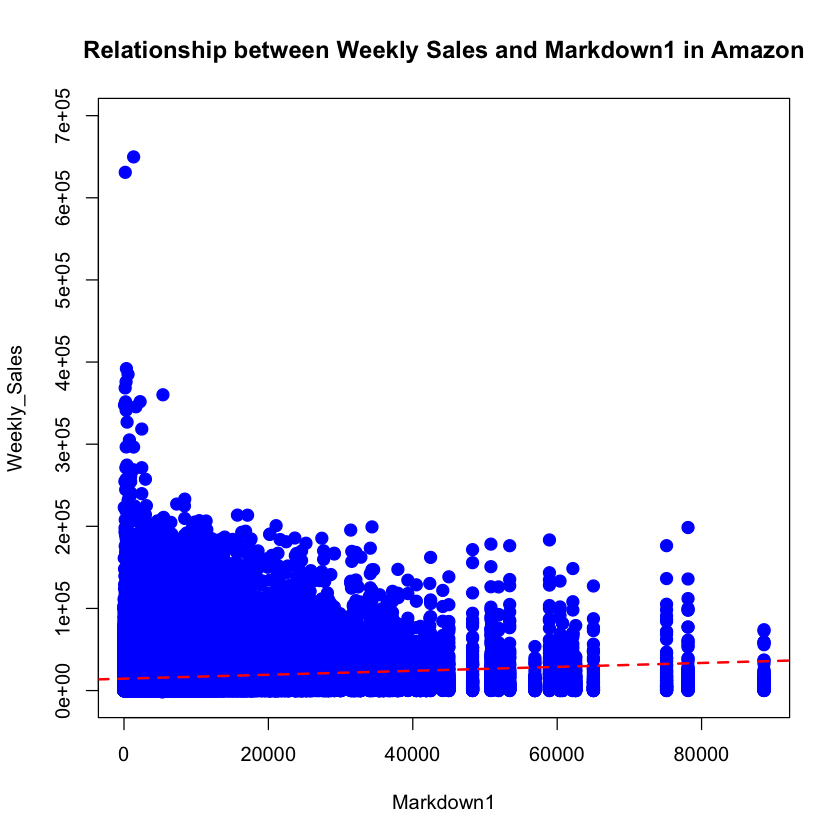

In [40]:
# Let's take a look at plot for model1 to see what inside. 
plot(sales_all$Weekly_Sales ~ sales_all$MarkDown1, col='blue', pch=20, cex=2, 
     main="Relationship between Weekly Sales and Markdown1 in Amazon", 
     xlab="Markdown1", ylab="Weekly_Sales")
abline(model1, col = 'red', lwd = 2, lty="dashed")

In [41]:
summary(model1)


Call:
lm(formula = Weekly_Sales ~ MarkDown1, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-35675 -13850  -8608   4283 634969 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.448e+04  7.931e+01  182.61   <2e-16 ***
MarkDown1   2.392e-01  7.202e-03   33.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23180 on 150679 degrees of freedom
  (270889 observations deleted due to missingness)
Multiple R-squared:  0.007268,	Adjusted R-squared:  0.007261 
F-statistic:  1103 on 1 and 150679 DF,  p-value: < 2.2e-16


Take a look at the p value here, it is significant to notice that p value is less than 0.05 which indicates the strong
affection between MarkDown1 and Weekly sales. 
The Adjusted R-square indicates the percentages of error which really insignificant in this case. 
The line chart indicates that there is not strong linear connection between line and the dots represented data. 
It seems line the model does not meet the linear assumption significantly.
Let's check the normality of the model. 

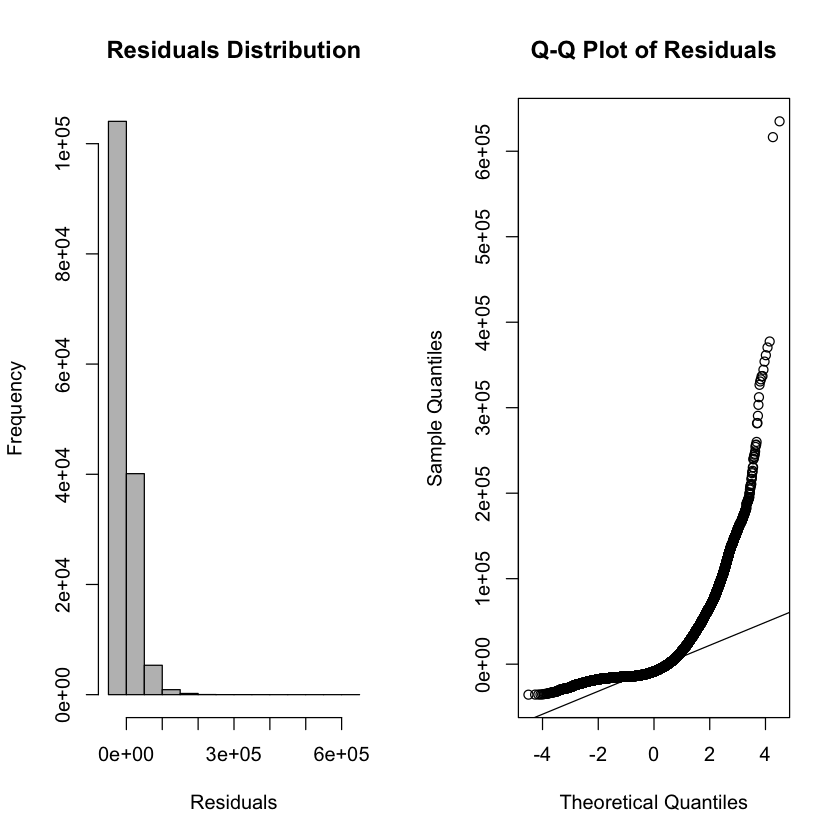

In [42]:
par(mfrow = c(1, 2)) 
hist(model1$residuals, xlab = "Residuals", col = "gray", 
     main = "Residuals Distribution") 
qqnorm(model1$residuals, main = "Q-Q Plot of Residuals") 
qqline(model1$residuals) 

The histogram shows residuals that look normally distributed. Meanwhile, the closer the residuals hug the diagonal line in the Q-Q plot, the more normal the distribution, as shown in the following diagrams. Seems like the end of the
line goes off track by the end indicating lack of connection. 



### model2

In [65]:
# Let's exclude all the NA in markdown first and we will take a look at this section concentrating on marketing strategy.
sales_all2<- sales_all[!is.na(sales_all$MarkDown2),]

In [66]:
# Formulating a model that reflect the relationship between Weekly Sales and Markdown2
model2<-lm(Weekly_Sales ~ MarkDown2, data = sales_all2)

In [45]:
1.685e+04 * 1000

[1] 16850000

In [46]:
 6.122e-02 *1000

[1] 61.22

Weekly sales increases by 61.22 dollars for every 1,000 dollars increase in markdown. 

Weekly sales is 16850000 dollars when total markdown 2 is $0

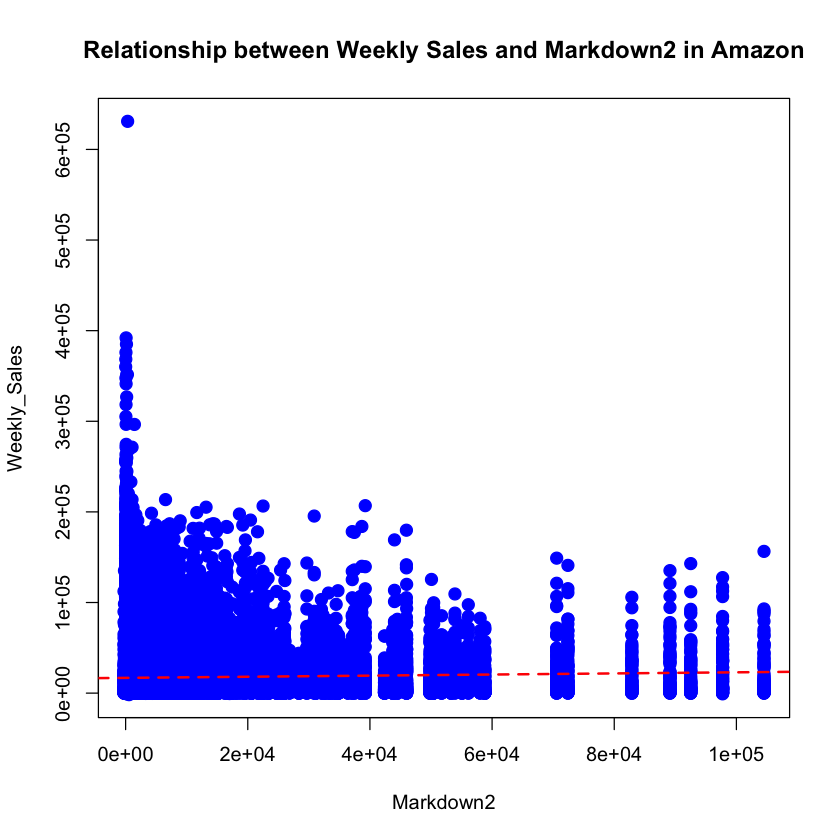

In [83]:
# Let's take a look at plot for model2 to see what inside. 
plot(sales_all2$Weekly_Sales ~ sales_all2$MarkDown2, col='blue', pch=20, cex=2, 
     main="Relationship between Weekly Sales and Markdown2 in Amazon", 
     xlab="Markdown2", ylab="Weekly_Sales")
abline(model2, col = 'red', lwd = 2, lty="dashed")

In [48]:
summary(model2)


Call:
lm(formula = Weekly_Sales ~ MarkDown2, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-23629 -14625  -8958   4547 614132 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.685e+04  7.639e+01  220.54  < 2e-16 ***
MarkDown2   6.122e-02  7.605e-03    8.05 8.33e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24030 on 111246 degrees of freedom
  (310322 observations deleted due to missingness)
Multiple R-squared:  0.0005822,	Adjusted R-squared:  0.0005733 
F-statistic: 64.81 on 1 and 111246 DF,  p-value: 8.331e-16


Take a look at the p value here, it is significant to notice that p value is less than 0.05 which indicates the strong
affection between MarkDown2 and Weekly sales. 
The Adjusted R-square indicates the percentages of error which really insignificant in this case. 
The line chart provide a better connection than model1 but still indicates that there is not strong linear connection 
between line and the dots represented data. 
It seems line the model does not meet the linear assumption significantly.
Let's check the normality of the model. 

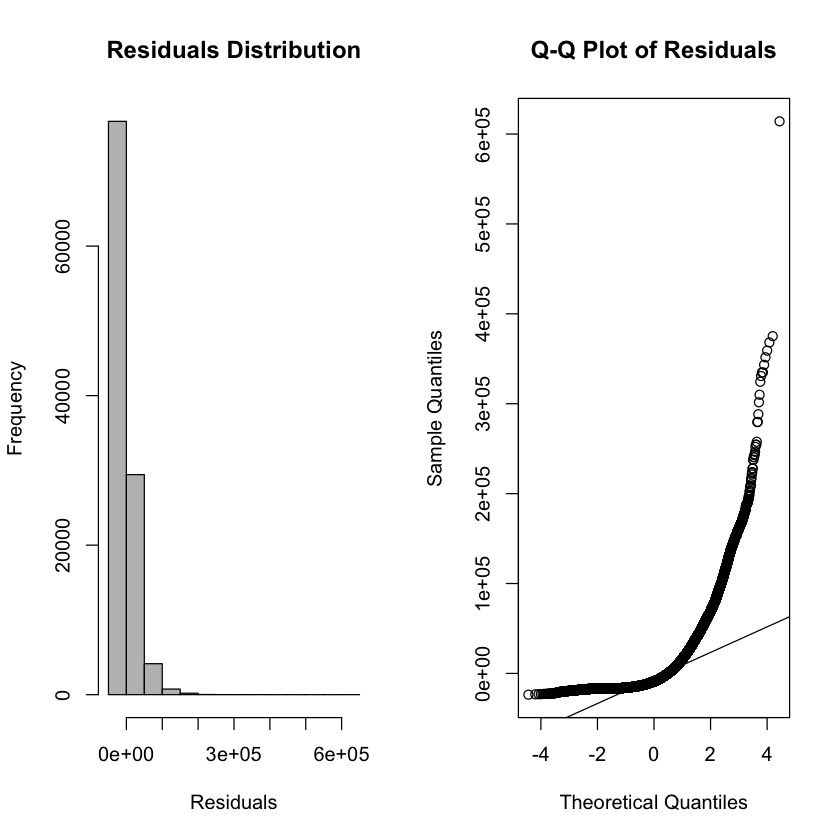

In [49]:
par(mfrow = c(1, 2)) 
hist(model2$residuals, xlab = "Residuals", col = "gray", 
     main = "Residuals Distribution") 
qqnorm(model2$residuals, main = "Q-Q Plot of Residuals") 
qqline(model2$residuals) 

The histogram shows residuals that look normally distributed. Meanwhile, the closer the residuals hug the diagonal line in the Q-Q plot, the more normal the distribution, as shown in the following diagrams. Seems like the end of the
line goes off track by the end indicating lack of connection. There less of outliner than in model1 but there still 
lack of conenction between the line and the dots.


#### Model 3

In [67]:
# Let's exclude all the NA in markdown first and we will take a look at this section concentrating on marketing strategy.
sales_all3<- sales_all[!is.na(sales_all$MarkDown3),]

In [68]:
# Formulating a model that reflect the relationship between Weekly Sales and Markdown3
model3<-lm(Weekly_Sales ~ MarkDown3, data = sales_all3)

In [69]:
model3


Call:
lm(formula = Weekly_Sales ~ MarkDown3, data = sales_all3)

Coefficients:
(Intercept)    MarkDown3  
  1.652e+04    1.491e-01  


In [52]:
1.491e-01  * 1000

[1] 149.1

In [53]:
 1.652e+04 * 1000

[1] 16520000

Weekly sales increases by 149.1 dollars for every 1,000 dollars increase in markdown. 

Weekly sales is 14480000 dollars when total markdown is $0

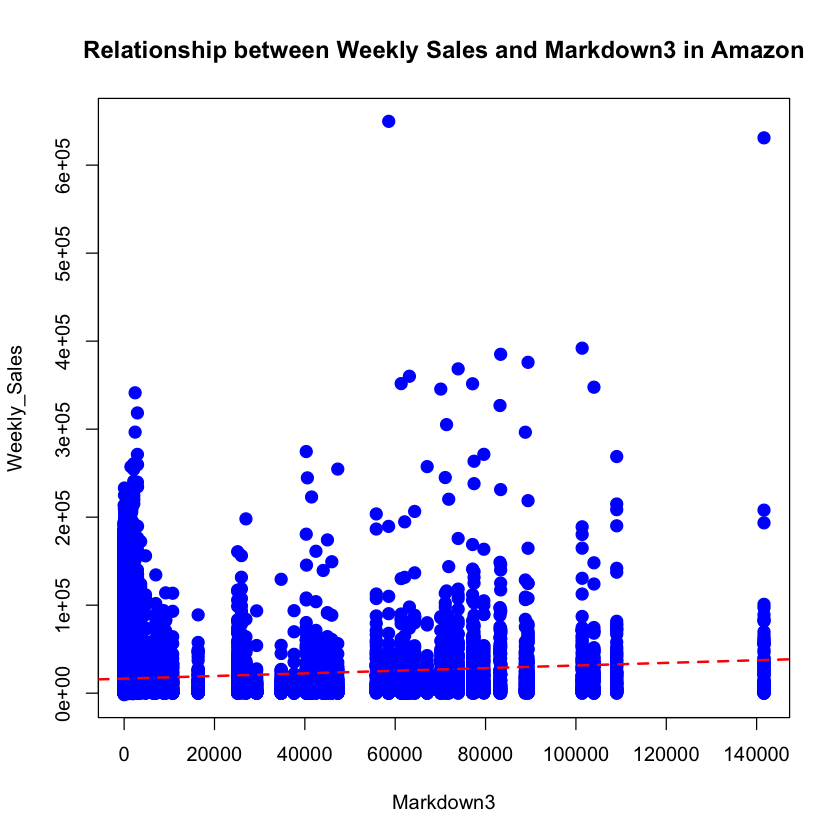

In [82]:
# Let's take a look at plot for model3 to see what inside. 
plot(sales_all3$Weekly_Sales ~ sales_all3$MarkDown3, col='blue', pch=20, cex=2, 
     main="Relationship between Weekly Sales and Markdown3 in Amazon", 
     xlab="Markdown3", ylab="Weekly_Sales")
abline(model3, col = 'red', lwd = 2, lty="dashed")

In [55]:
summary(model3)


Call:
lm(formula = Weekly_Sales ~ MarkDown3, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-37621 -14424  -8765   4381 624519 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.652e+04  6.475e+01   255.1   <2e-16 ***
MarkDown3   1.491e-01  6.655e-03    22.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23710 on 137089 degrees of freedom
  (284479 observations deleted due to missingness)
Multiple R-squared:  0.003646,	Adjusted R-squared:  0.003639 
F-statistic: 501.7 on 1 and 137089 DF,  p-value: < 2.2e-16


Take a look at the p value here, it is significant to notice that p value is less than 0.05 which indicates the strong
affection between MarkDown3 and Weekly sales. 
The Adjusted R-square indicates the percentages of error which really insignificant in this case. 
The line chart provide a better connection than model1 and model2 with great distribution of variances represented by
dots surrounding the line, which meets the linear assumption. 
Let's check the normality of the model. 

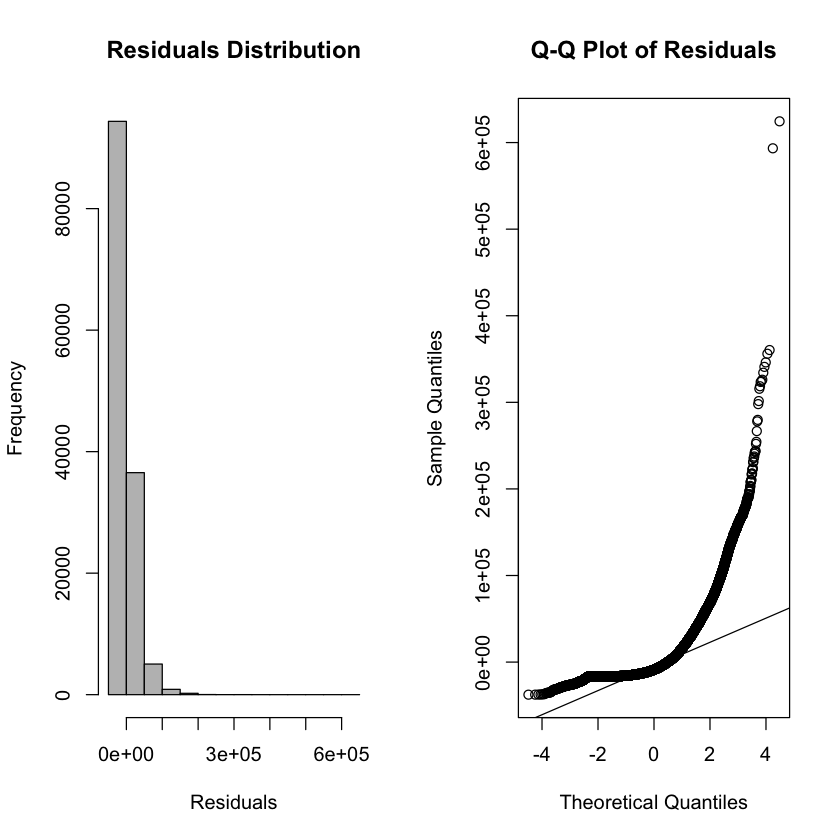

In [56]:
par(mfrow = c(1, 2)) 
hist(model3$residuals, xlab = "Residuals", col = "gray", 
     main = "Residuals Distribution") 
qqnorm(model3$residuals, main = "Q-Q Plot of Residuals") 
qqline(model3$residuals) 

The histogram shows residuals that look normally distributed. Meanwhile, the closer the residuals hug the diagonal line in the Q-Q plot, 
the more normal the distribution, as shown in the following diagrams. Seems like the end of the
line goes off track by the end indicating lack of connection. There less of outliner than in model1 and model2
but there still lack of conenction between the line and the dots.

#### Model 4

In [70]:
# Let's exclude all the NA in markdown first and we will take a look at this section concentrating on marketing strategy.
sales_all4<- sales_all[!is.na(sales_all$MarkDown4),]

In [71]:
# Formulating a model that reflect the relationship between Weekly Sales and Markdown4
model4<-lm(Weekly_Sales ~ MarkDown4, data = sales_all4)

In [72]:
model4


Call:
lm(formula = Weekly_Sales ~ MarkDown4, data = sales_all4)

Coefficients:
(Intercept)    MarkDown4  
  1.644e+04    1.721e-01  


In [59]:
1.721e-01  * 1000

[1] 172.1

In [60]:
1.644e+04 * 1000

[1] 16440000

Weekly sales increases by 172.1 dollars for every 1,000 dollars increase in markdown.
Weekly sales is 16440000 dollars when total markdown 2 is $0

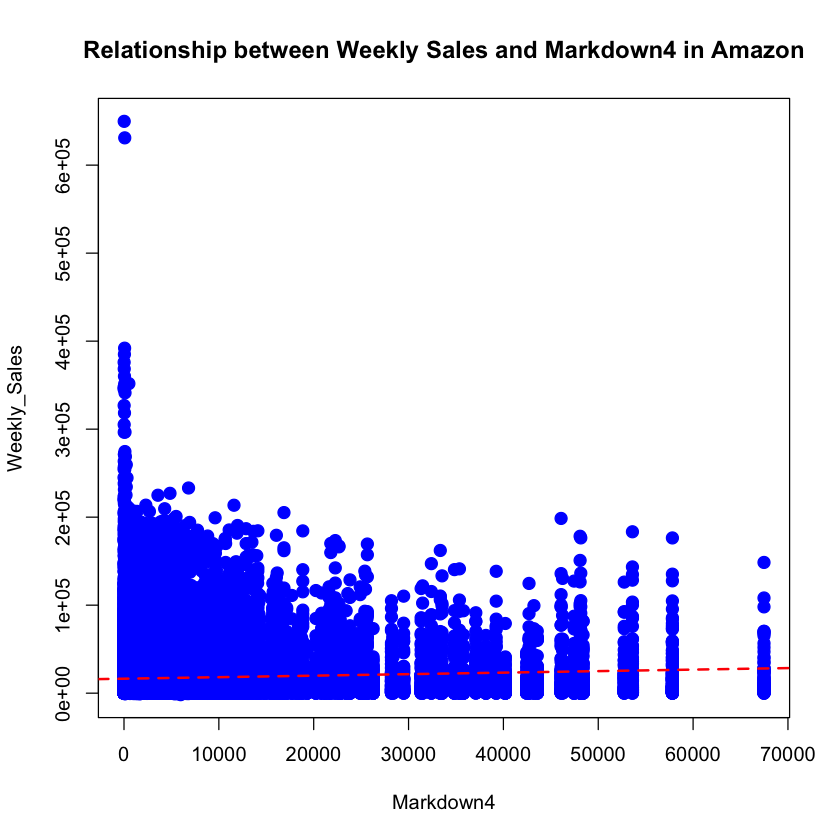

In [81]:
# Let's take a look at plot for model4 to see what inside. 
plot(sales_all4$Weekly_Sales ~ sales_all4$MarkDown4, col='blue', pch=20, cex=2, 
     main="Relationship between Weekly Sales and Markdown4 in Amazon", 
     xlab="Markdown4", ylab="Weekly_Sales")
abline(model4, col = 'red', lwd = 2, lty="dashed")

In [62]:
summary(model4)


Call:
lm(formula = Weekly_Sales ~ MarkDown4, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-28035 -14381  -8824   4508 633323 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.644e+04  7.363e+01   223.3   <2e-16 ***
MarkDown4   1.721e-01  1.031e-02    16.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23820 on 134965 degrees of freedom
  (286603 observations deleted due to missingness)
Multiple R-squared:  0.002062,	Adjusted R-squared:  0.002055 
F-statistic: 278.9 on 1 and 134965 DF,  p-value: < 2.2e-16


Take a look at the p value here, it is significant to notice that p value is less than 0.05 which indicates the strong
affection between MarkDown2 and Weekly sales. 
The Adjusted R-square indicates the percentages of error which really insignificant in this case. 
The Residual line chart provide a great connection compare to the rest of model  indicates that there is significant strong linear connection between line and the dots represented data, indicating high probability between actual values and predicted values. 
It seems line the model does meet the linear assumption significantly.
Let's check the normality of the model. 

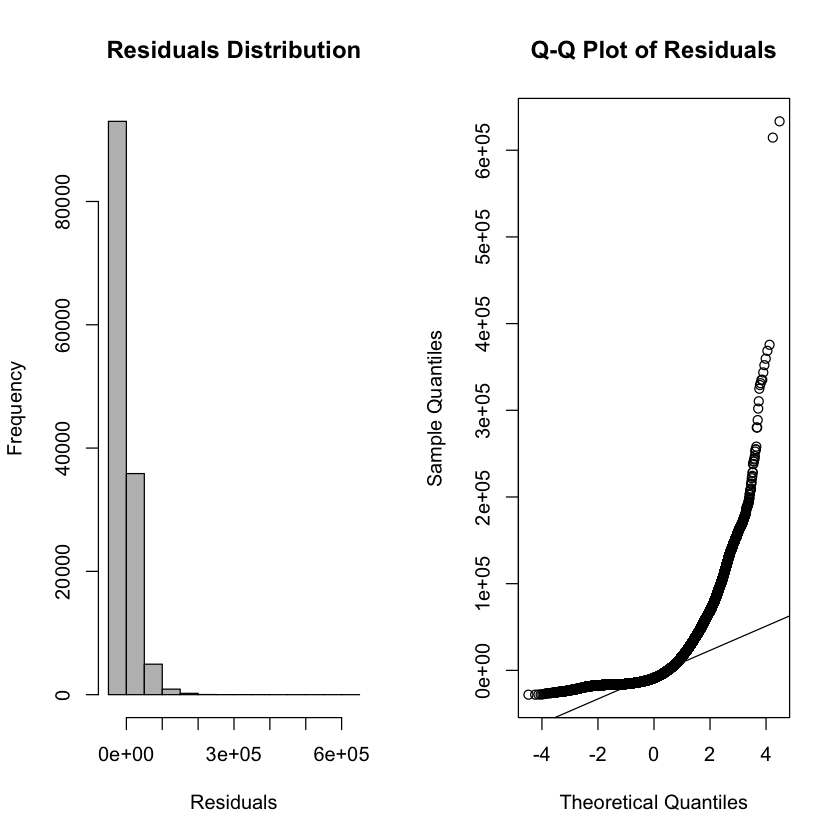

In [63]:
par(mfrow = c(1, 2)) 
hist(model4$residuals, xlab = "Residuals", col = "gray", 
     main = "Residuals Distribution") 
qqnorm(model4$residuals, main = "Q-Q Plot of Residuals") 
qqline(model4$residuals) 

The histogram shows residuals that look normally distributed. Meanwhile, the closer the residuals hug the diagonal line in the Q-Q plot, 
the more normal the distribution, as shown in the following diagrams. Seems like the end of the
line goes off track by the end indicating lack of connection. There are better connection when the line meet the dots
but then the dots goes off by the end of the line indicates lack of connection. 

#### Model 5

In [75]:
# Let's exclude all the NA in markdown first and we will take a look at this section concentrating on marketing strategy.
sales_all5<- sales_all[!is.na(sales_all$MarkDown5),]

In [76]:
# Formulating a model that reflect the relationship between Weekly Sales and Markdown4
model5<-lm(Weekly_Sales ~ MarkDown5, data = sales_all5)

In [77]:
model5


Call:
lm(formula = Weekly_Sales ~ MarkDown5, data = sales_all5)

Coefficients:
(Intercept)    MarkDown5  
  1.455e+04    3.521e-01  


In [78]:
3.521e-01 * 1000

[1] 352.1

In [79]:
1.455e+04 * 1000

[1] 14550000

Weekly sales increases by 352.1 dollars for every 1,000 dollars increase in markdown. 

Weekly sales is 14550000 dollars when total markdown is $0

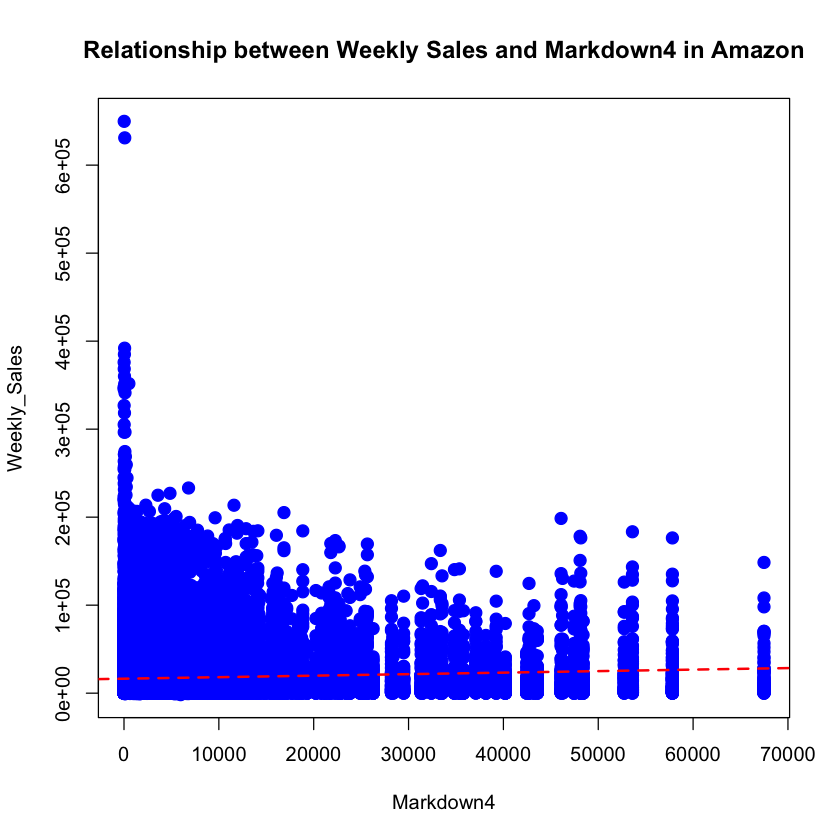

In [84]:
# Let's take a look at plot for model4 to see what inside. 
plot(sales_all5$Weekly_Sales ~ sales_all5$MarkDown4, col='blue', pch=20, cex=2, 
  mainb="Relationship between Weekly Sales and Markdown4 in Amazon", 
     xlab="Markdown4", ylab="Weekly_Sales")
abline(model4, col = 'red', lwd = 2, lty="dashed")

In [85]:
summary(model5)


Call:
lm(formula = Weekly_Sales ~ MarkDown5, data = sales_all5)

Residuals:
   Min     1Q Median     3Q    Max 
-52765 -13910  -8547   4225 632974 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.455e+04  7.528e+01  193.25   <2e-16 ***
MarkDown5   3.521e-01  9.972e-03   35.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23140 on 151430 degrees of freedom
Multiple R-squared:  0.008165,	Adjusted R-squared:  0.008159 
F-statistic:  1247 on 1 and 151430 DF,  p-value: < 2.2e-16


Take a look at the p value here, it is significant to notice that p value is less than 0.05 which indicates the strong
affection between MarkDown5 and Weekly sales. 
The Adjusted R-square indicates the percentages of error which really insignificant in this case. 
The Residual line chart provide the greatest connection  indicates that there is significant strong linear connection 
between line and the dots represented data, indicating high probability between actual values and predicted values. 
It seems line the model does meet the linear assumption significantly.
Let's check the normality of the model. 

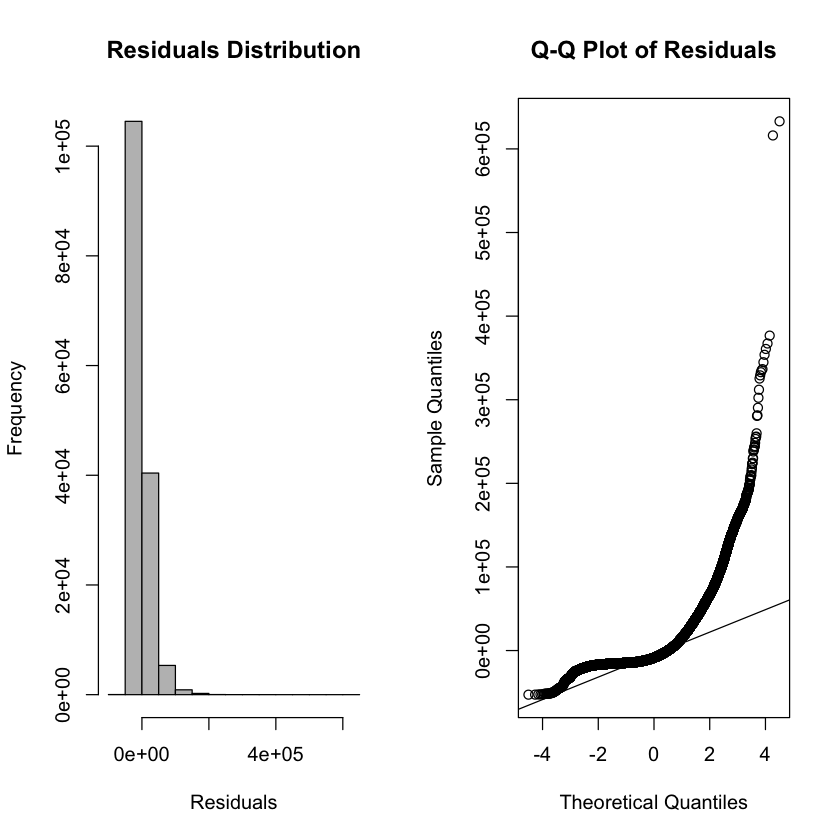

In [86]:
par(mfrow = c(1, 2)) 
hist(model5$residuals, xlab = "Residuals", col = "gray", 
     main = "Residuals Distribution") 
qqnorm(model5$residuals, main = "Q-Q Plot of Residuals") 
qqline(model5$residuals) 

The histogram shows residuals that look normally distributed. Meanwhile, the closer the residuals hug significantly
the diagonal line in the Q-Q plot, the more normal the distribution, as shown in the following diagrams. There are 
better connection when the line meet the dotsbut then the dots goes off by the end of the line indicates 
lack of connection. However, compare to the rested of the models, model5 represents great conenction and indicates
the normality of model as well as the equalty of the variance and the independence. There are more probability to 
predict the weeklu sales through Model 5 and 3.

### <font color='brown' size=6><ul class="list-inline">4. Model Comparision </ul></font>

According to 5 different Model, it is noticable to have some comparision like below: 

- Linearity Model Assumptions: according to the summary and the plot indicating the relationship between Markdown and Sales, it is significant to note that Model 2,3 and 4 has a great distribute of variances as well as the correlation with the line being more obvious than the rest of models. 
- F and P value, significant and effection of model: 5 models all have significant p value indicates the strong affect of the model. (2e-16 ***)
- Normalty of Model:Model 5 and Model 4 has a great normalty of model than the rest of model. 
- Equal Variance: the normal distribution of variances are observed well in Model 3, Model 4 and Model 5. 
- Coefficient: Model2, Model3 and Model 4 has great results of coefficient which indicates strong relation with weekly sales. 
- Adjusted R-Square: Module 2 has the least adjusted R-Square, following by Module 3 and Module 4. Module 1 and Module 2 has higher value in term of adjusted R-Square. 
- Independence of Variance: Markdown in general are pretty independent in term of variance since different location could provide different Markdown depends on events and locations. 

In overall, I would lile to illustates that  Model 4 qualifies most of core assumption in Linear Regression 
which are Linearity, Independence, Normality and Equal Variance. Model 2 and Model 3 are better in term of normality
and coefficient while the linearity are expressed well in term of model 5. 

### <font color='brown' size=6><ul class="list-inline">5. Multiple Linear Regression </ul></font>

### Model1

In [13]:
# Let's look into the relationship between Weekly Sales and all the Markdowns. 
model01 <- lm(Weekly_Sales ~ MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5, 
             data = sales_all) 

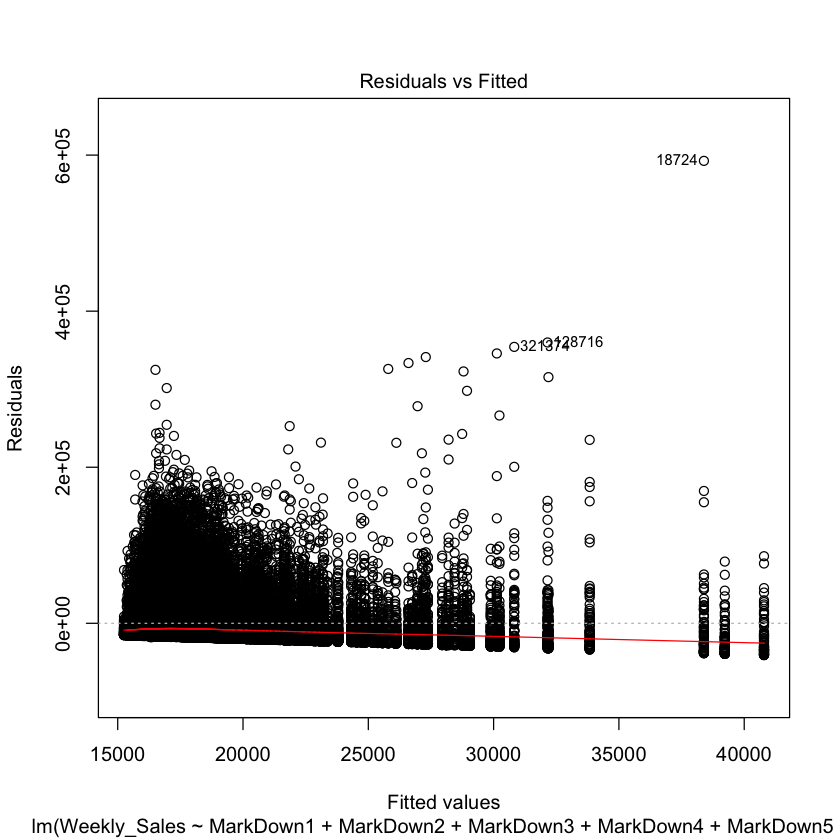

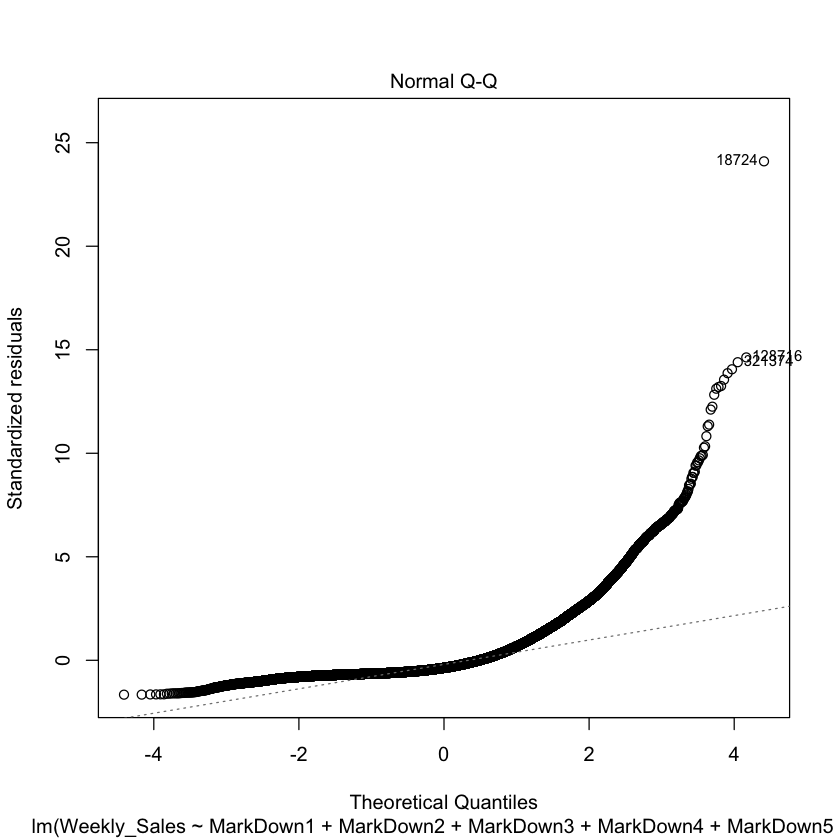

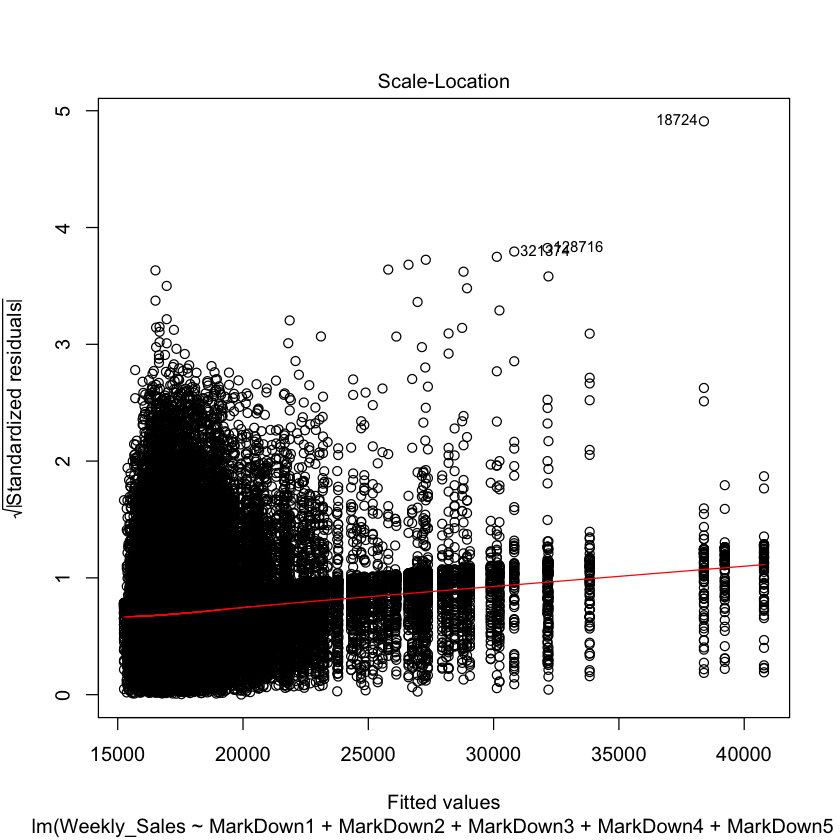

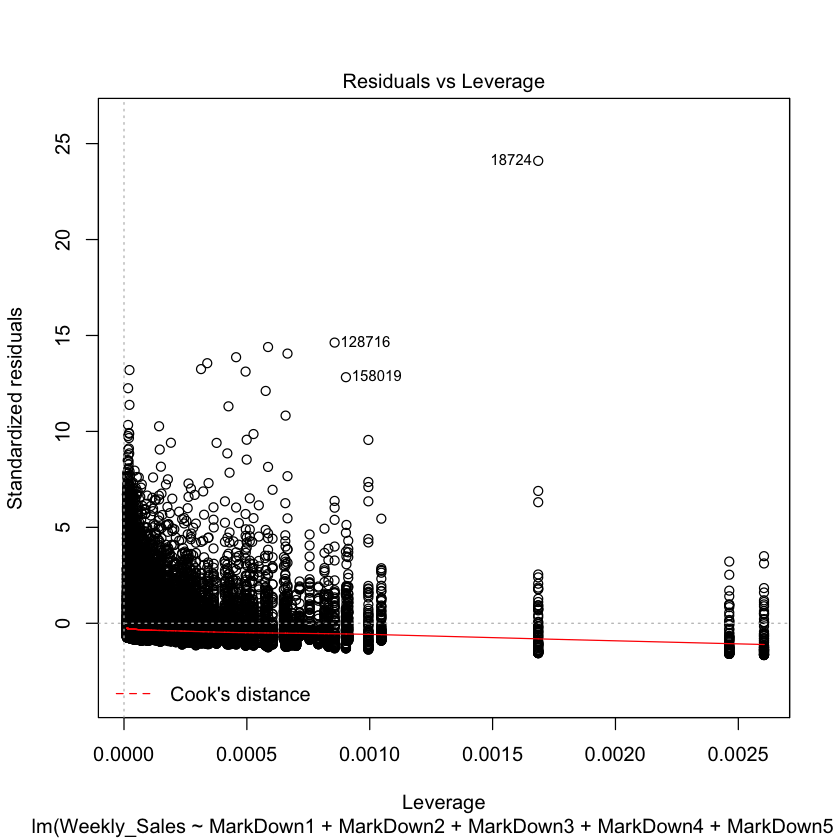

In [14]:
plot(model01)

You will see that the Residuals vs Fitted plot shows a slight bow, which might indicate non-linearity.
We could also see the normality of the line and the dots indicating the normality assumption qualification along with 
low rate of Cook's distance.

In [15]:
summary(model01)


Call:
lm(formula = Weekly_Sales ~ MarkDown1 + MarkDown2 + MarkDown3 + 
    MarkDown4 + MarkDown5, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-40798 -14670  -8984   4896 592607 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.516e+04  1.339e+02 113.245  < 2e-16 ***
MarkDown1    1.357e-01  1.537e-02   8.831  < 2e-16 ***
MarkDown2    5.106e-02  7.869e-03   6.489 8.69e-11 ***
MarkDown3    1.622e-01  7.273e-03  22.298  < 2e-16 ***
MarkDown4   -4.301e-02  1.973e-02  -2.180   0.0292 *  
MarkDown5    2.236e-01  1.217e-02  18.371  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24610 on 97050 degrees of freedom
  (324514 observations deleted due to missingness)
Multiple R-squared:  0.009907,	Adjusted R-squared:  0.009856 
F-statistic: 194.2 on 5 and 97050 DF,  p-value: < 2.2e-16


The five predictors result in five oefficients as well as three individual p-values. 
low p-values indicate that the variable helps explain the model better than higher p-values.According to this summary, It is noticable that Markdown 2 has the most significant p value indicates that the strong confidence in the model and to reject null hypothesis while Markdown 4 is unecessary in the model since it gives high value of 0.0292.This modelindicates the facts there lack of confident to tell that MarkDown4 has significantly affected the weekly sales of Amazon. 



### Model2

In [16]:
# Let's look into the relationship between Weekly Sales in the context of Temperature, CPI and Fuel_Price
model02 <- lm(Weekly_Sales ~ Temperature + CPI + Fuel_Price, 
             data = sales_all) 

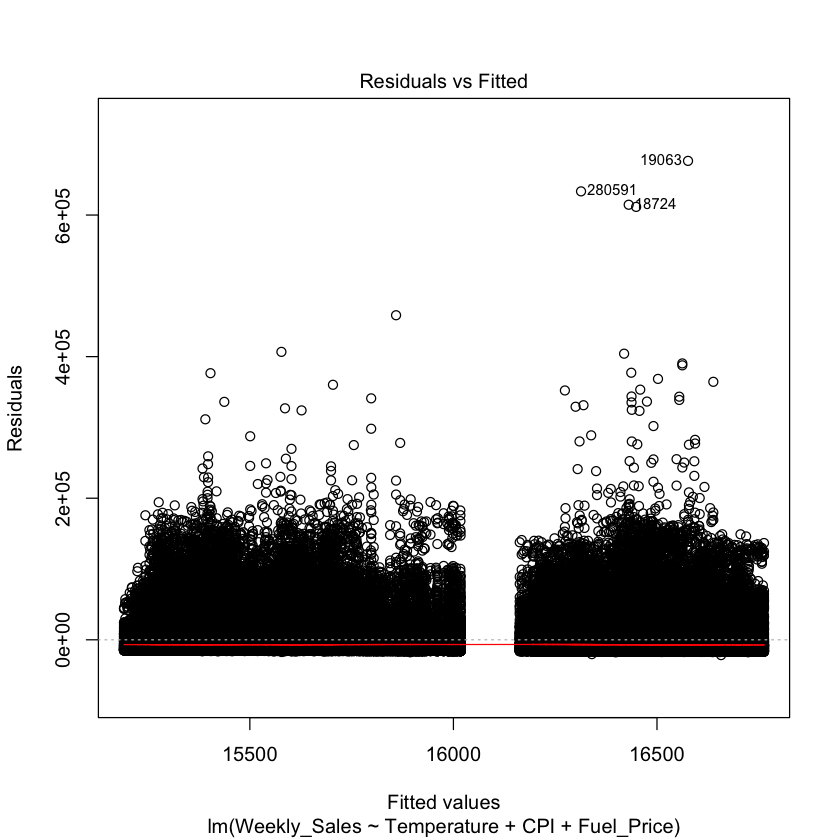

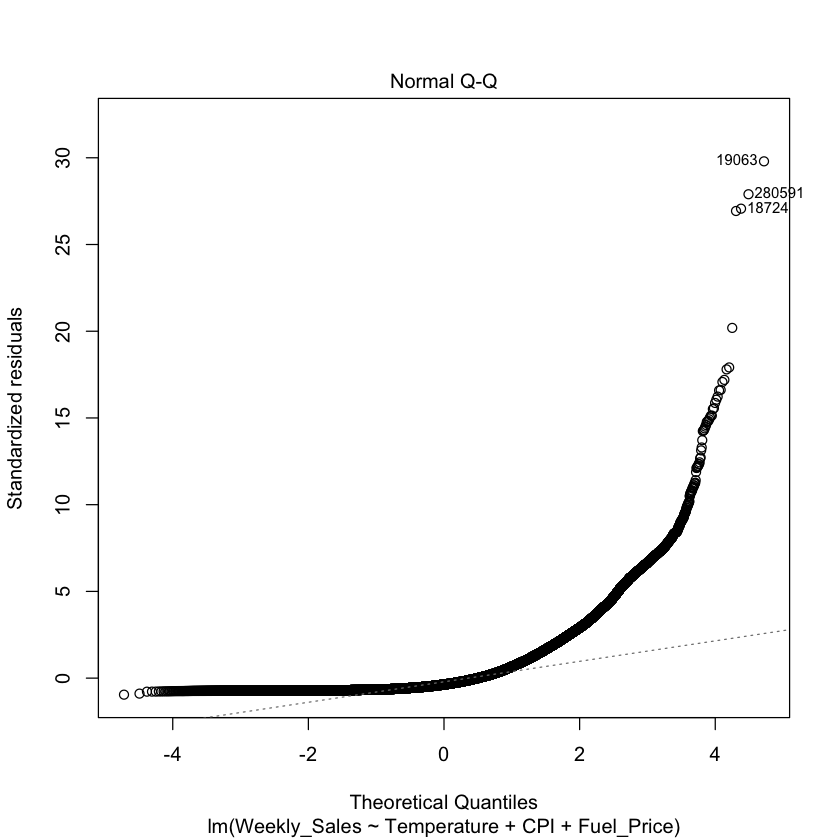

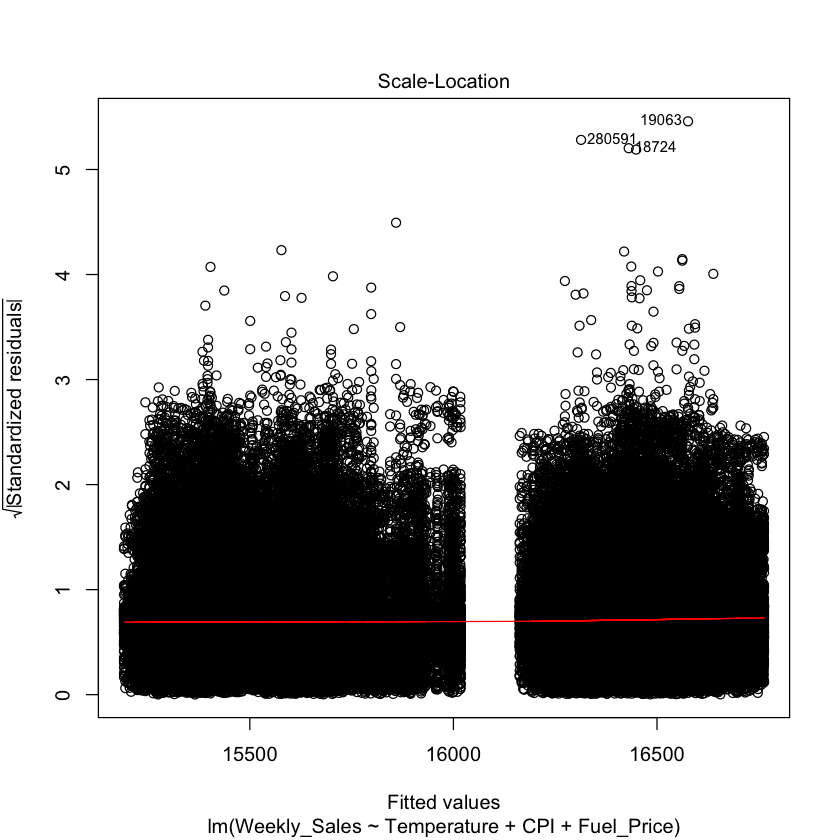

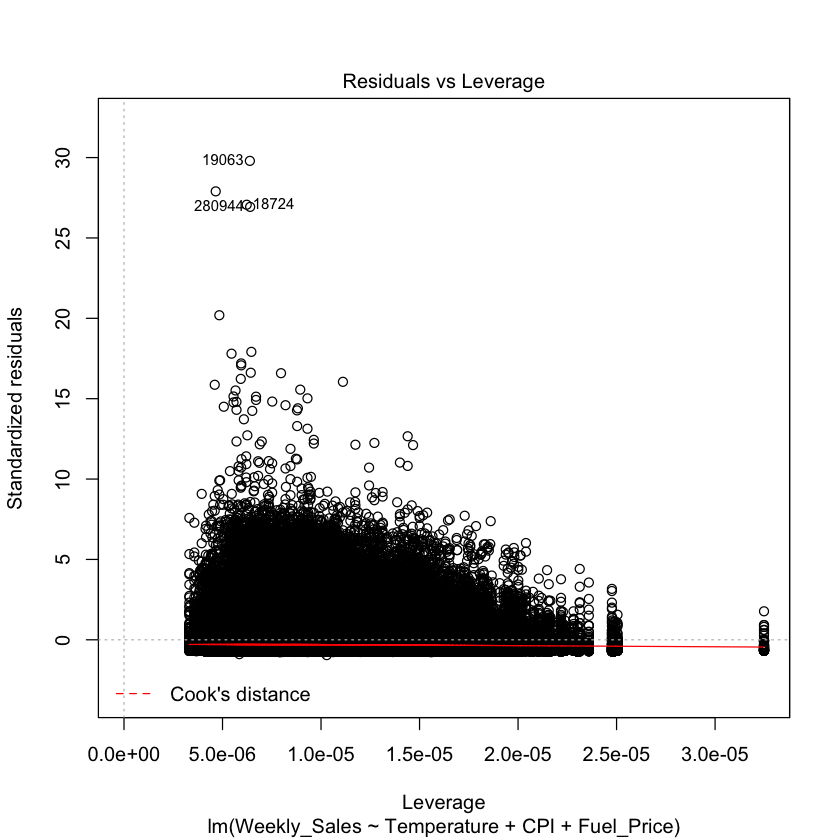

In [17]:
plot(model02)

It is significant to notice that there are high probability of variances and the distribution through out different
plot. However, we also see the violation of normality indicating something within the model affect the significant 
and affection toward weekly sales. Let's find out. 

In [18]:
summary(model02)


Call:
lm(formula = Weekly_Sales ~ Temperature + CPI + Fuel_Price, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-21646 -13838  -8356   4230 676523 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18673.5387   327.6879  56.986   <2e-16 ***
Temperature     2.8055     1.9596   1.432   0.1522    
CPI           -12.7612     0.9261 -13.779   <2e-16 ***
Fuel_Price   -201.1642    78.5913  -2.560   0.0105 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22710 on 421566 degrees of freedom
Multiple R-squared:  0.0004556,	Adjusted R-squared:  0.0004484 
F-statistic: 64.04 on 3 and 421566 DF,  p-value: < 2.2e-16


The three predictors result in three coefficients as well as three individual p-values. 
low p-values indicate that the variable helps explain the model better than higher p-values.
According to this summary, It is noticable that CPI has the most significant p value indicates that 
the strong confidence in the model that CPI affects the weekly sales in Amazon.
Meanwhile, Temperature and Fuel_Price are unecessary in the model since they give high value of 0.1522 and 0.0105 
alternatively.These indicates the facts there lack of confident to tell that Temperature and Fuel_Price
has significantly affected the weekly sales of Amazon. 



In overall, model 1 in Multiple Linear Regression section provide significant trends and help to predict the weekly 
sales in Amazon in acordance to the Markdown. I accordance to Model 1 with multiple linear Regression, it is significant
to indicates that except Markdown 4, there are high probability to increase weekly sales by affecting the amount of
Markdown 1, 2,3 and 5. Comparing to Simple Linear Regression, Multiple Linear Regression provides more comprehensive
viewpoints and details as well as information of the coreleation and significant of the variable and experimental 
variance.In the model 02 under Multiple Linear Regression section, it is noticeable that CPI affects weekly sales
significantly while there is lack of confidence to prove that temperature and fuel price doing the same. 

### <font color='brown' size=6><ul class="list-inline">6. Summary </ul></font>

In overall, model 1 in Multiple Linear Regression section provide significant trends and help to predict the weekly 
sales in Amazon in acordance to the Markdown. I accordance to Model 1 with multiple linear Regression, it is significant
to indicates that except Markdown 4, there are high probability to increase weekly sales by affecting the amount of
Markdown 1, 2,3 and 5. Comparing to Simple Linear Regression, Multiple Linear Regression provides more comprehensive
viewpoints and details as well as information of the coreleation and significant of the variable and experimental 
variance.In the model 02 under Multiple Linear Regression section, it is noticeable that CPI affects weekly sales
significantly while there is lack of confidence to prove that temperature and fuel price doing the same. 

In linear Regression, I would lile to illustates that  Model 4 qualifies most of core assumption in Linear Regression 
which are Linearity, Independence, Normality and Equal Variance. Model 2 and Model 3 are better in term of normality
and coefficient while the linearity are expressed well in term of model 5. Take a look at the p value, it is significant to notice that p value is less than 0.05 which indicates the strongaffection between MarkDown1,MarkDown2, MarkDown3, MarkDown5 and Weekly sales. The Adjusted R-square indicates the percentages of error which really insignificant in this case. The line chart of model 4 and 5 provide a better connection than model1 and model2 with great distribution of variances represented bydots surrounding the line, which meets the linear assumption. 


### <font color='brown' size=6><ul class="list-inline">7. Recommendation </ul></font>

There are significant evident to indicates that Amazon should focus on marketing and CPI in order to boost weekly sales. There lack of conidence to illustrates that temperature and fuel affects weekly sales or not but the fuel price does slightly affect the sales in according to the plot and the p values. Working in different strategy by combining researching the CPI market as well as utilize method for boosting sales are the recommendation for Amazon to attracts more customer as well as strenthen its brand. Amazon should also revise the MarkDown 4 to improve the 
effectiveness in term of better discount, promotion as well as reasonable with the market to achieve better results in sales.

In the meantime, Amazon should continues to provide more Markdown type 2,3,5 since these marketing strategy helps 
Amazon gains profit through weekly sales in constrast to the revenue earned without it. These methods have strong
coefficient in the sales of Amazon, followed by CPI. Promoting and providing discounts as well as promotion based on
CPI could help Amazon understand the customer and target to the market in the right timing for boosting sales. 